# Chapter 16 - OBJECT-ORIENTED PROGRAMMING AND INHERITANCE
<a id = 'chapter_16_title'></a>

**Table of Contents**
- [Source code - wizcoin](#source_code_wizcoin)<br>
- [Source code - Bank Account](#source_code_bank_account)<br>
- [Non-OOP vs. OOP Examples: Tic-Tac-Toe](#non_oop_vs_oop_tic_tac_toe)<br>
  - [Non-OOP Tic-Tac-Toe](#non_oop_tic_tac_toe)<br>
  - [OOP Tic-Tac-Toe](#oop_tic_tac_toe)<br>
- [Inheritance Example](#inheritance_example)<br>
- [Overriding Methods](#overriding_methods)<br>
- [The super() Function](#the_super_function)<br>
- [Favor Composition Over Inheritance](#favor_composition_over_inheritance)<br>
- [The isinstance() and issubclass() Functions](#the_isinstance_and_issubclass_functions)<br>
- [Class and Static Object-Oriented Features](#class_and_static_object_oriented_features)<br>
  - [Class Methods](#class_methods)<br>
  - [Class Attributes](#class_attributes)<br>
  - [Static Methods](#static_methods)<br>
  - [When to Use Class and Static Object-Oriented Features](#when_to_use_class_and_static_object_oriented_features)<br>
- [Multiple Inheritance](#multiple_inheritance)<br>
- [Method Resolution Order](#method_resolution_order)<br>

### Addiitonal reference:
- [Chapter Text](https://inventwithpython.com/beyond/chapter15.html)<br>
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet)<br>
- [Markdown for Jupyter notebooks cheatsheet -IBM](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)<br>
- [Markdown cells - Jupyter Notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)<br>

### Source code - wizcoin
<a id = 'source_code_wizcoin'></a>

Markdown cells are great for having code displayed you don't want to run. Three backticks : `` ``` `` , on either end of the code will create a code block. 

Entering the syntax (i.e 'Python') after the first set will enable syntax highlighting. It also supports SQL, Excel, and tons of other languages!

```python

class WizCoin:
    def __init__(self, galleons, sickles, knuts):
        """Create a new WizCoin object with 
        galleons, sickles and knuts."""
        self.galleons = galleons
        self.sickles  = sickles
        self.knuts    = knuts
        # NOTE: __init__() methods NEVER 
        # have a return statement.
        
    def value(self):
        """The value (in knuts) of all the coins 
        in this WizCoin object."""
        return (self.galleons * 17 * 29) + 
        (self.sickles * 29) + (self.knuts)
    
    def weightInGrams(self):
        """Returns the weight of the coins 
        in grams."""
        return (self.galleons * 31.103) + 
        (self.sickles * 11.34) + (self.knuts * 5.0)
        
```

In [1]:
import wizcoin

In [3]:
purse = wizcoin.WizCoin(2, 5, 99)  # The ints are passed to __init__().
print(purse)
print('G:', purse.galleons, 'S:', purse.sickles, 'K:', purse.knuts)
print('Total value:', purse.value())
print('Weight:', purse.weightInGrams(), 'grams')

print()

coinJar = wizcoin.WizCoin(13, 0, 0)  # The ints are passsed to __init__().
print(coinJar)
print('G:', coinJar.galleons, 'S:', coinJar.sickles, 'K:', coinJar.knuts)
print('Total value:', coinJar.value())
print('Weight:', coinJar.weightInGrams(), 'grams')

G: 2 S: 5 K: 99
Total value: 1230
Weight: 613.906 grams

G: 13 S: 0 K: 0
Total value: 6409
Weight: 404.339 grams


In [3]:
change = wizcoin.WizCoin(9, 7, 20)
print(change.sickles)  # Prints 7.
change.sickles += 10
print(change.sickles)  # Prints 17.

pile = wizcoin.WizCoin(2, 3, 31)
print(pile.sickles)  # Prints 3.
pile.someNewAttribute = 'a new attr'  # A new attribute is created.
print(pile.someNewAttribute)

7
17
3
a new attr


[Back to Top](#chapter_16_title)<br>

### Source code - BankAccount
<a id = 'source_code_bank_account'></a>

In [8]:
class BankAccount:
    def __init__(self, accountHolder):
        # BankAccount methods can access self._balance, but code outside of
        # this class should not:
        self._balance = 0
        self._name = accountHolder
        with open(self._name + 'Ledger.txt', 'w') as ledgerFile:
            ledgerFile.write('Balance is 0\n')
        
    def deposit(self, amount):
        if amount <= 0:
            return  # Don't allow negative "deposits".
        self._balance += amount
        with open(self._name + 'Ledger.txt', 'a') as ledgerFile:
            ledgerFile.write('Deposit ' + str(amount) + '\n')
            ledgerFile.write('Balance is ' + str(self._balance) + '\n')
    
    def withdraw(self, amount):
        if self._balance < amount or amount < 0:
            return  # Not enough in account, or withdraw is negative.
        self._balance -= amount
        with open(self._name + 'Ledger.txt', 'a') as ledgerFile:
            ledgerFile.write('Withdraw ' + str(amount) + '\n')
            ledgerFile.write('Balance is ' + str(self._balance) + '\n')

In [9]:
acct = BankAccount('Alice')  # We create an account for Alice.
acct.deposit(120)  # _balance can be affected through deposit()
acct.withdraw(40)  # _balance can be affected through withdraw()

In [10]:
# Changing _name or _balance outside of BankAccount is impolite, but allowed:
acct._balance = 1000000000
acct.withdraw(1000)

In [11]:
acct._name = 'Bob'  # Now we're modifying Bob's account ledger!
acct.withdraw(1000)  # This withdrawal is recorded in BobLedger.txt!

In [1]:
 # Passing the type object to str() returns a messy string.
str(type(42)) 

"<class 'int'>"

In [2]:
# The __qualname__ attribute is nicer looking.
type(42).__qualname__ 

'int'

[Back to Top](#chapter_16_title)<br>

## Non-OOP vs. OOP Examples: Tic-Tac-Toe
<a id = 'non_oop_vs_oop_tic_tac_toe'></a>

### Non-OOP Tic-Tac-Toe
<a id = 'non_oop_tic_tac_toe'></a>

In [1]:
# tictactoe.py, A non-OOP tic-tac-toe game.
# By Al Sweigart al@inventwithpython.com

# Setting up constants:

ALL_SPACES = list('123456789')  # They keys for a TTT board dictionary.
X, O, BLANK = 'X', 'O', ' '  # Constants for string values.

def main():
    """Runs a game of tic-tac-toe."""
    print('Welcome to tic-tac-toe!')
    gameBoard = getBlankBoard()  # Create a TTT board dictionary.
    currentPlayer, nextPlayer = X, O  # X goes first, O goes next.
    
    while True:
        print(getBoardStr(gameBoard))  # Display the board on the screen.
        
        # Keep asking the player until they enter a number 1-9:
        move = None
        while not isValidSpace(gameBoard, move):
            print(f'What is {currentPlayer}\'s move? (1-9)')
            move = input()
        updateBoard(gameBoard, move, currentPlayer)  # Make the move.
        
        # Check if the game is over:
        if isWinner(gameBoard, currentPlayer):  # First check for victory.
            print(getBoardStr(gameBoard))
            print(currentPlayer + ' has won the game!')
            break
        elif isBoardFull(gameBoard):  # Next check for a tie.
            print(getBoardStr(gameBoard))
            print('The game is a tie!')
            break
        currentPlayer, nextPlayer = nextPlayer, currentPlayer  # Swap turns.
    print('Thanks for playing!')

def getBlankBoard():
    """Create a new, blank tic-tac-toe board."""
    board = {}  # The board is represented as a Python dictionary.
    for space in ALL_SPACES:
        board[space] = BLANK  # All spaces start as blank.
    return board

def getBoardStr(board):
    """Return a text-representation of the board."""
    return f'''
      {board['1']}|{board['2']}|{board['3']}  1 2 3
      -+-+-
      {board['4']}|{board['5']}|{board['6']}  4 5 6
      -+-+-
      {board['7']}|{board['8']}|{board['9']}  7 8 9'''

def isValidSpace(board, space):
    """Returns True if the space on the board is a valid space number
    and the space is blank."""
    return space in ALL_SPACES and board[space] == BLANK

def isWinner(board, player):
    """Return True if player is a winner on this TTTBoard."""
    b, p = board, player  # Shorter names as "syntactic sugar".
    # Check for 3 marks across the 3 rows, 3 columns, and 2 diagonals.
    return ((b['1'] == b['2'] == b['3'] == p) or  # Across the top
            (b['4'] == b['5'] == b['6'] == p) or  # Across the middle
            (b['7'] == b['8'] == b['9'] == p) or  # Across the bottom
            (b['1'] == b['4'] == b['7'] == p) or  # Down the left
            (b['2'] == b['5'] == b['8'] == p) or  # Down the middle
            (b['3'] == b['6'] == b['9'] == p) or  # Down the right
            (b['3'] == b['5'] == b['7'] == p) or  # Diagonal
            (b['1'] == b['5'] == b['9'] == p))    # Diagonal

def isBoardFull(board):
    """Return True if every space on the board has been taken."""
    for space in ALL_SPACES:
        if board[space] == BLANK:
            return False  # If a single space is blank, return False.
    return True  # No spaces are blank, so return True.

def updateBoard(board, space, mark):
    """Sets the space on the board to mark."""
    board[space] = mark
    
if __name__ == '__main__':
    main()  # Call main() if this module is run, but not when imported.

Welcome to tic-tac-toe!

       | |   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
1

      X| |   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
1
What is O's move? (1-9)
2

      X|O|   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
4

      X|O|   1 2 3
      -+-+-
      X| |   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
3

      X|O|O  1 2 3
      -+-+-
      X| |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
7

      X|O|O  1 2 3
      -+-+-
      X| |   4 5 6
      -+-+-
      X| |   7 8 9
X has won the game!
Thanks for playing!


### OOP Tic-Tac-Toe
<a id = 'oop_tic_tac_toe'></a>

In [8]:
# tictactoe_oop.py, an object-oriented tic-tac-toe game.

ALL_SPACES = list('123456789')  # The keys for a TTT board.
X, O, BLANK = 'X', 'O', ' '  # Constants for string values.

def main():
    """Runs a game of tic-tac-toe."""
    print('Welcome to tic-tac-toe!')
    gameBoard = TTTBoard()  # Create a TTT board object.
    currentPlayer, nextPlayer = X, O  # X goes first, O goes next.
    
    while True:
        print(gameBoard.getBoardStr())  # Display the board on the screen.
        
        # Keep asking the player until they enter a number 1-9:
        move = None
        while not gameBoard.isValidSpace(move):
            print(f'What is {currentPlayer}\'s move? (1-9)')
            move = input()
        gameBoard.updateBoard(move, currentPlayer)  # Make the move.
        
        # Check if the game is over:
        if gameBoard.isWinner(currentPlayer):  # First check for victory.
            print(gameBoard.getBoardStr())
            print(currentPlayer + ' has won the game!')
            break
        elif gameBoard.isBoardFull():  # Next check for a tie.
            print(gameBoard.getBoardStr())
            print('The game is a tie!')
            break
        currentPlayer, nextPlayer = nextPlayer, currentPlayer  # Swap turns 
    print('Thanks for playing!')

class TTTBoard:
    def __init__(self, usePrettyBoard = False, useLogging = False):
        """Create a new, blank tic tac toe board."""
        self._spaces = {}  # The board is represented as a Python dictionary.
        for space in ALL_SPACES:
            self._spaces[space] = BLANK  # All spaces start as blank.
        
    def getBoardStr(self):
        """Return a text-representation of the board."""
        return f'''
      {self._spaces['1']}|{self._spaces['2']}|{self._spaces['3']}  1 2 3
      -+-+-
      {self._spaces['4']}|{self._spaces['5']}|{self._spaces['6']}  4 5 6
      -+-+-
      {self._spaces['7']}|{self._spaces['8']}|{self._spaces['9']}  7 8 9'''
    
    def isValidSpace(self, space):
        """Returns True if the space on the board is a valid space number
        and the space is blank."""
        return space in ALL_SPACES and self._spaces[space] == BLANK
    
    def isWinner(self, player):
        """Return True if player is a winner on this TTTBoard."""
        s, p = self._spaces, player  # Shorter names as "syntactic sugar"
        # Check for 3 marks across the 3 rows, 3 columns, and 2 diagonals.
        return ((s['1'] == s['2'] == s['3'] == p) or  # Across the top
                (s['4'] == s['5'] == s['6'] == p) or  # Across the middle
                (s['7'] == s['8'] == s['9'] == p) or  # Across the bottom
                (s['1'] == s['4'] == s['7'] == p) or  # Down the left
                (s['2'] == s['5'] == s['8'] == p) or  # Down the middle
                (s['3'] == s['6'] == s['9'] == p) or  # Down the right
                (s['3'] == s['5'] == s['7'] == p) or  # Diagonal 
                (s['1'] == s['5'] == s['9'] == p))    # Diagonal
    
    def isBoardFull(self):
        """Return True if every space on the board has been taken."""
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                return False  # If a single space is blank, return False.
        return True  # No spaces are blank, so return True.
    
    def updateBoard(self, space, player):
        """Sets the space on the board to player."""
        self._spaces[space] = player

if __name__ == '__main__':
    main()  # Call main() if this module is run, but not when imported.

Welcome to tic-tac-toe!

       | |   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
1

      X| |   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
2

      X|O|   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
3

      X|O|X  1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
5

      X|O|X  1 2 3
      -+-+-
       |O|   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
4

      X|O|X  1 2 3
      -+-+-
      X|O|   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
9

      X|O|X  1 2 3
      -+-+-
      X|O|   4 5 6
      -+-+-
       | |O  7 8 9
What is X's move? (1-9)
7

      X|O|X  1 2 3
      -+-+-
      X|O|   4 5 6
      -+-+-
      X| |O  7 8 9
X has won the game!
Thanks for playing!


[Back to Top](#chapter_16_title)<br>

### Inheritance Example
<a id = 'inheritance_example'></a>

In [1]:
class ParentClass:
    def printHello(self):
        print('Hello, world!')

class ChildClass(ParentClass):
    def someNewMethod(self):
        print("ParentClass objects don't have this method.")

class GrandchildClass(ChildClass):
    def anotherNewMethod(self):
        print('Only GrandchildClass objects have this method.')

In [3]:
print('Create a ParentClass object and call its methods:')

parent = ParentClass()
parent.printHello()

print()
print('Create a ChildClass object and call its methods:')

child = ChildClass()
child.printHello()
child.someNewMethod()

print()
print('Create a GrandchildClass object and call its methods:')

grandchild = GrandchildClass()
grandchild.printHello()
grandchild.someNewMethod()
grandchild.anotherNewMethod()

print()
print('An error:')
parent.someNewMethod()

Create a ParentClass object and call its methods:
Hello, world!

Create a ChildClass object and call its methods:
Hello, world!
ParentClass objects don't have this method.

Create a GrandchildClass object and call its methods:
Hello, world!
ParentClass objects don't have this method.
Only GrandchildClass objects have this method.

An error:


AttributeError: 'ParentClass' object has no attribute 'someNewMethod'

[Back to Top](#chapter_16_title)<br>

### Overriding Methods
<a id = 'overriding_methods'></a>

In [10]:
# tictactoe_oop.py, an object-oriented tic-tac-toe game.

ALL_SPACES = list('123456789')  # The keys for a TTT board.
X, O, BLANK = 'X', 'O', ' '  # Constants for string values.

def main():
    """Runs a game of tic-tac-toe."""
    print('Welcome to tic-tac-toe!')
    
    if input('Use mini board? Y/N: ').lower().startswith('y'):
        gameBoard = MiniBoard()  # Create a MiniBoard object.  
    else: 
        gameBoard = TTTBoard()  # Create a TTT board object.
    
    currentPlayer, nextPlayer = X, O  # X goes first, O goes next.
    
    while True:
        print(gameBoard.getBoardStr())  # Display the board on the screen.
        
        # Keep asking the player until they enter a number 1-9:
        move = None
        while not gameBoard.isValidSpace(move):
            print(f'What is {currentPlayer}\'s move? (1-9)')
            move = input()
        gameBoard.updateBoard(move, currentPlayer)  # Make the move.
        
        # Check if the game is over:
        if gameBoard.isWinner(currentPlayer):  # First check for victory.
            print(gameBoard.getBoardStr())
            print(currentPlayer + ' has won the game!')
            break
        elif gameBoard.isBoardFull():  # Next check for a tie.
            print(gameBoard.getBoardStr())
            print('The game is a tie!')
            break
        currentPlayer, nextPlayer = nextPlayer, currentPlayer  # Swap turns 
    print('Thanks for playing!')

class TTTBoard:
    def __init__(self, usePrettyBoard = False, useLogging = False):
        """Create a new, blank tic tac toe board."""
        self._spaces = {}  # The board is represented as a Python dictionary.
        for space in ALL_SPACES:
            self._spaces[space] = BLANK  # All spaces start as blank.
        
    def getBoardStr(self):
        """Return a text-representation of the board."""
        return f'''
      {self._spaces['1']}|{self._spaces['2']}|{self._spaces['3']}  1 2 3
      -+-+-
      {self._spaces['4']}|{self._spaces['5']}|{self._spaces['6']}  4 5 6
      -+-+-
      {self._spaces['7']}|{self._spaces['8']}|{self._spaces['9']}  7 8 9'''
    
    def isValidSpace(self, space):
        """Returns True if the space on the board is a valid space number
        and the space is blank."""
        return space in ALL_SPACES and self._spaces[space] == BLANK
    
    def isWinner(self, player):
        """Return True if player is a winner on this TTTBoard."""
        s, p = self._spaces, player  # Shorter names as "syntactic sugar"
        # Check for 3 marks across the 3 rows, 3 columns, and 2 diagonals.
        return ((s['1'] == s['2'] == s['3'] == p) or  # Across the top
                (s['4'] == s['5'] == s['6'] == p) or  # Across the middle
                (s['7'] == s['8'] == s['9'] == p) or  # Across the bottom
                (s['1'] == s['4'] == s['7'] == p) or  # Down the left
                (s['2'] == s['5'] == s['8'] == p) or  # Down the middle
                (s['3'] == s['6'] == s['9'] == p) or  # Down the right
                (s['3'] == s['5'] == s['7'] == p) or  # Diagonal 
                (s['1'] == s['5'] == s['9'] == p))    # Diagonal
    
    def isBoardFull(self):
        """Return True if every space on the board has been taken."""
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                return False  # If a single space is blank, return False.
        return True  # No spaces are blank, so return True.
    
    def updateBoard(self, space, player):
        """Sets the space on the board to player."""
        self._spaces[space] = player

# This class inherits and overrides TTTBoard methods        
class MiniBoard(TTTBoard):
    def getBoardStr(self):
        """Return a tiny text-representation of the board."""
        # Change blank spaces to a '.'
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                self._spaces[space] = '.'
        
        boardStr = f'''
           {self._spaces['1']}{self._spaces['2']}{self._spaces['3']} 123
           {self._spaces['4']}{self._spaces['5']}{self._spaces['6']} 456
           {self._spaces['7']}{self._spaces['8']}{self._spaces['9']} 789'''
        
        # Change '.' back to blank spaces.
        for space in ALL_SPACES:
            if self._spaces[space] == '.':
                self._spaces[space] = BLANK
        return boardStr
        
if __name__ == '__main__':
    main()  # Call main() if this module is run, but not when imported.

Welcome to tic-tac-toe!
Use mini board? Y/N: y

           ... 123
           ... 456
           ... 789
What is X's move? (1-9)
1

           X.. 123
           ... 456
           ... 789
What is O's move? (1-9)
3

           X.O 123
           ... 456
           ... 789
What is X's move? (1-9)
2

           XXO 123
           ... 456
           ... 789
What is O's move? (1-9)
4

           XXO 123
           O.. 456
           ... 789
What is X's move? (1-9)
6

           XXO 123
           O.X 456
           ... 789
What is O's move? (1-9)
5

           XXO 123
           OOX 456
           ... 789
What is X's move? (1-9)
7

           XXO 123
           OOX 456
           X.. 789
What is O's move? (1-9)
8

           XXO 123
           OOX 456
           XO. 789
What is X's move? (1-9)
9

           XXO 123
           OOX 456
           XOX 789
The game is a tie!
Thanks for playing!


[Back to Top](#chapter_16_title)<br>

### The super() Function
<a id = 'the_super_function'></a>

In [11]:
# tictactoe_oop.py, an object-oriented tic-tac-toe game.

import copy

ALL_SPACES = list('123456789')  # The keys for a TTT board.
X, O, BLANK = 'X', 'O', ' '  # Constants for string values.

def main():
    """Runs a game of tic-tac-toe."""
    print('Welcome to tic-tac-toe!')
    
    if input('Use hint board? Y/N: ').lower().startswith('y'):
        gameBoard = HintBoard()  # Create a Hint Board object.  
    else: 
        gameBoard = TTTBoard()  # Create a TTT board object.
    
    currentPlayer, nextPlayer = X, O  # X goes first, O goes next.
    
    while True:
        print(gameBoard.getBoardStr())  # Display the board on the screen.
        
        # Keep asking the player until they enter a number 1-9:
        move = None
        while not gameBoard.isValidSpace(move):
            print(f'What is {currentPlayer}\'s move? (1-9)')
            move = input()
        gameBoard.updateBoard(move, currentPlayer)  # Make the move.
        
        # Check if the game is over:
        if gameBoard.isWinner(currentPlayer):  # First check for victory.
            print(gameBoard.getBoardStr())
            print(currentPlayer + ' has won the game!')
            break
        elif gameBoard.isBoardFull():  # Next check for a tie.
            print(gameBoard.getBoardStr())
            print('The game is a tie!')
            break
        currentPlayer, nextPlayer = nextPlayer, currentPlayer  # Swap turns 
    print('Thanks for playing!')

class TTTBoard:
    def __init__(self, usePrettyBoard = False, useLogging = False):
        """Create a new, blank tic tac toe board."""
        self._spaces = {}  # The board is represented as a Python dictionary.
        for space in ALL_SPACES:
            self._spaces[space] = BLANK  # All spaces start as blank.
        
    def getBoardStr(self):
        """Return a text-representation of the board."""
        return f'''
      {self._spaces['1']}|{self._spaces['2']}|{self._spaces['3']}  1 2 3
      -+-+-
      {self._spaces['4']}|{self._spaces['5']}|{self._spaces['6']}  4 5 6
      -+-+-
      {self._spaces['7']}|{self._spaces['8']}|{self._spaces['9']}  7 8 9'''
    
    def isValidSpace(self, space):
        """Returns True if the space on the board is a valid space number
        and the space is blank."""
        return space in ALL_SPACES and self._spaces[space] == BLANK
    
    def isWinner(self, player):
        """Return True if player is a winner on this TTTBoard."""
        s, p = self._spaces, player  # Shorter names as "syntactic sugar"
        # Check for 3 marks across the 3 rows, 3 columns, and 2 diagonals.
        return ((s['1'] == s['2'] == s['3'] == p) or  # Across the top
                (s['4'] == s['5'] == s['6'] == p) or  # Across the middle
                (s['7'] == s['8'] == s['9'] == p) or  # Across the bottom
                (s['1'] == s['4'] == s['7'] == p) or  # Down the left
                (s['2'] == s['5'] == s['8'] == p) or  # Down the middle
                (s['3'] == s['6'] == s['9'] == p) or  # Down the right
                (s['3'] == s['5'] == s['7'] == p) or  # Diagonal 
                (s['1'] == s['5'] == s['9'] == p))    # Diagonal
    
    def isBoardFull(self):
        """Return True if every space on the board has been taken."""
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                return False  # If a single space is blank, return False.
        return True  # No spaces are blank, so return True.
    
    def updateBoard(self, space, player):
        """Sets the space on the board to player."""
        self._spaces[space] = player

# This class inherits and overrides TTTBoard methods        
class MiniBoard(TTTBoard):
    def getBoardStr(self):
        """Return a tiny text-representation of the board."""
        # Change blank spaces to a '.'
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                self._spaces[space] = '.'
        
        boardStr = f'''
           {self._spaces['1']}{self._spaces['2']}{self._spaces['3']} 123
           {self._spaces['4']}{self._spaces['5']}{self._spaces['6']} 456
           {self._spaces['7']}{self._spaces['8']}{self._spaces['9']} 789'''
        
        # Change '.' back to blank spaces.
        for space in ALL_SPACES:
            if self._spaces[space] == '.':
                self._spaces[space] = BLANK
        return boardStr
    
# This child class uses super() function to call its parent class' 
# original method in the child class' overriding method
class HintBoard(TTTBoard):
    def getBoardStr(self):
        """Return a text-representation of the board with hints."""
        boardStr = super().getBoardStr()  # Call the getBoardStr() in TTTBoard.
        
        xCanWin = False
        oCanWin = False
        
        originalSpaces = self._spaces  # Backup _spaces.
        
        for space in ALL_SPACES:  # Check each space:
            
            # Simulate X moving on this space:
            self._spaces = copy.copy(originalSpaces)
            if self._spaces[space] == BLANK:
                self._spaces[space] = X
            if self.isWinner(X):
                xCanWin = True
            
            # Simulate O moving on this space:
            self._spaces = copy.copy(originalSpaces)
            if self._spaces[space] == BLANK:
                self._spaces[space] = O
            if self.isWinner(O):
                oCanWin = True
            
        if xCanWin:
            boardStr += '\nX can win in one more move.'
        if oCanWin:
            boardStr += '\nO can win in one more move.' 
        
        self._spaces = originalSpaces
        return boardStr
        
if __name__ == '__main__':
    main()  # Call main() if this module is run, but not when imported.

Welcome to tic-tac-toe!
Use hint board? Y/N: y

       | |   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
1

      X| |   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
2

      X|O|   1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is X's move? (1-9)
3

      X|O|X  1 2 3
      -+-+-
       | |   4 5 6
      -+-+-
       | |   7 8 9
What is O's move? (1-9)
5

      X|O|X  1 2 3
      -+-+-
       |O|   4 5 6
      -+-+-
       | |   7 8 9
O can win in one more move.
What is X's move? (1-9)
8

      X|O|X  1 2 3
      -+-+-
       |O|   4 5 6
      -+-+-
       |X|   7 8 9
What is O's move? (1-9)
6

      X|O|X  1 2 3
      -+-+-
       |O|O  4 5 6
      -+-+-
       |X|   7 8 9
O can win in one more move.
What is X's move? (1-9)
3
What is X's move? (1-9)
3
What is X's move? (1-9)
4

      X|O|X  1 2 3
      -+-+-
      X|O|O  4 5 6
      -+-+-
       |X|   7 8 9
X can w

[Back to Top](#chapter_16_title)<br>

### Favor Composition Over Inheritance
<a id = 'favor_composition_over_inheritance'></a>

Inheritance is a great technique for code reuse, and you might want to start using it immediately in all your classes. 

But you might not always want the base and subclasses to be so tightly coupled. Creating multiple levels of inheritance doesn’t add organization so much as bureaucracy to your code.

Although you can use inheritance for classes with “is a” relationships (in other words, when the child class is a kind of the parent class), it’s often favorable to use a technique called composition for classes with “has a” relationships. 

Composition is the class design technique of including objects in your class rather than inheriting those objects’ class. 

This is what we do when we add attributes to our classes. When designing your classes using inheritance, favor composition instead of inheritance. 

This is what we’ve been doing with all the examples in this and the previous chapter, as described in the following list:

- A WizCoin object “has an” amount of galleon, sickle, and knut coins.
- A TTTBoard object “has a” set of nine spaces.
- A MiniBoard object “is a” TTTBoard object, so it also “has a” set of nine spaces.
- A HintBoard object “is a” TTTBoard object, so it also “has - a” set of nine spaces.

In [1]:
import wizcoin

In [2]:
class WizardCustomer:
    def __init__(self, name):
        self.name = name
        self.purse = wizcoin.WizCoin(0, 0, 0)

In [3]:
wizard = WizardCustomer('Alice')
print(f'{wizard.name} has {wizard.purse.value()} knuts worth of money.')
print(f'{wizard.name}\'s coins weigh {wizard.purse.weightInGrams()} grams.')

Alice has 0 knuts worth of money.
Alice's coins weigh 0.0 grams.


### The isinstance() and issubclass() Functions
<a id = 'the_isinstance_and_issubclass_functions'></a>

In [5]:
class ParentClass:
    pass

class ChildClass(ParentClass):
    pass

In [6]:
parent = ParentClass()  # Create a ParentClass object.
child = ChildClass()  # Create a ChildClass object.

In [7]:
isinstance(parent, ParentClass)

True

In [8]:
isinstance(parent, ChildClass)

False

In [9]:
isinstance(child, ChildClass)

True

In [10]:
isinstance(child, ParentClass)

True

You can also pass a tuple of class objects as the second argument to see whether the first argument is one of any of the classes in the tuple:

In [11]:
isinstance(41, (int, str, bool))  # True if 42 is an int, str, or bool.

True

The less commonly used issubclass() built-in function can identify whether the class object passed for the first argument is a subclass of (or the same class as) the class object passed for the second argument:

In [13]:
issubclass(ChildClass, ParentClass)  # ChildClass subclasses ParentClass.

True

In [14]:
issubclass(ChildClass, str)  # ChildClass doesn't subclass str.

False

In [15]:
issubclass(ChildClass, ChildClass)  # ChildClass is ChildClass

True

[Back to Top](#chapter_16_title)<br>

## Class and Static Object-Oriented Features
<a id = 'class_and_static_object_oriented_features'></a>

### Class Methods
<a id = 'class_methods'></a>

Class methods are associated with a class rather than with individual objects, like regular methods are. You can recognize a class method in code when you see two markers: the @classmethod decorator before the method’s def statement and the use of cls as the first parameter, as shown in the following example.

In [16]:
class ExampleClass:
    def exampleRegularMethod(self):
        print('This is a regular method.')
    
    @classmethod
    def exampleClassMethod(cls):
        print('This is a class method.')

In [17]:
# Call the class method without instantiating an object:
ExampleClass.exampleClassMethod()

This is a class method.


In [18]:
obj = ExampleClass()

# Given the above line, these two lines are equivalent:
obj.exampleClassMethod()
obj.__class__.exampleClassMethod()

This is a class method.
This is a class method.


The cls parameter acts like self except self refers to an object, but the cls parameter refers to an object’s class. 

This means that the code in a class method cannot access an individual object’s attributes or call an object’s regular methods.

Class methods can only call other class methods or access class attributes. 

We use the name cls because class is a Python keyword, and just like other keywords, such as if, while, or import, we can’t use it for parameter names. 

We often call class attributes through the class object, as in ExampleClass.exampleClassMethod(). But we can also call them through any object of the class, as in obj.exampleClassMethod().

Class methods aren’t commonly used. The most frequent use case is to provide alternative constructor methods besides __init__(). 

For example, what if a constructor function could accept either a string of data the new object needs or a string of a filename that contains the data the new object needs? We don’t want the list of the __init__() method’s parameters to be lengthy and confusing. 

Instead let’s use class methods to return a new object.

For example, let’s create an AsciiArt class. As you saw in Chapter 14, ASCII art uses text characters to form an image.

In [19]:
class AsciiArt:
    def __init__(self, characters):
        self._characters = characters
    
    @classmethod
    def fromFile(cls, filename):
        with open(filename) as fileObj:
            characters = fileObj.read()
            return cls(characters)
    
    def display(self):
        print(self._characters)
    
    # Other AsciiArt methods would go here...

In [20]:
face1 = AsciiArt(' _______\n' +
                 '|  . .  |\n' +
                 '| \\___/ |\n' +
                 '|_______|')

In [21]:
face1.display()

 _______
|  . .  |
| \___/ |
|_______|


In [26]:
face2 = AsciiArt.fromFile('face.txt')

In [27]:
face2.display()

 _______
|  . .  |
| \___/ |
|_______|


[Back to Top](#chapter_16_title)<br>

The fromFile() class method makes your code a bit easier to read, compared to having __init__() do everything.

Another benefit of class methods is that a subclass of AsciiArt can inherit its fromFile() method (and override it if necessary). 

This is why we call cls(characters) in the AsciiArt class’s fromFile() method instead of AsciiArt(characters). The cls() call will also work in subclasses of AsciiArt without modification because the AsciiArt class isn’t hardcoded into the method. 

But an AsciiArt() call would always call AsciiArt class’s __init__() instead of the subclass’s __init__(). You can think of cls as meaning “an object representing this class.”

Keep in mind that just as regular methods should always use their self parameter somewhere in their code, a class method should always use its cls parameter. If your class method’s code never uses the cls parameter, it’s a sign that your class method should probably just be a function.

### Class Attributes
<a id = 'class_attributes'></a>

A class attribute is a variable that belongs to the class rather than to an object. We create class attributes inside the class but outside all methods, just like we create global variables in a .py file but outside all functions. Here’s an example of a class attribute named count, which keeps track of how many CreateCounter objects have been created:

In [1]:
class CreateCounter:
    count = 0  # This is a class attribute.
    
    def __init__(self):
        CreateCounter.count += 1

In [2]:
print('Objects created:', CreateCounter.count)  # prints 0

Objects created: 0


In [3]:
a = CreateCounter()
b = CreateCounter()
c = CreateCounter()

In [4]:
print('Objects created:', CreateCounter.count)  # prints 3

Objects created: 3


The CreateCounter class has a single class attribute named count. 

All CreateCounter objects share this attribute rather than having their own separate count attributes. 

This is why the CreateCounter.count += 1 line in the constructor function can keep count of every CreateCounter object created.

We rarely use class attributes. Even this “count how many CreateCounter objects have been created” example can be done more simply by using a global variable instead of a class attribute.

[Back to Top](#chapter_16_title)<br>

### Static Methods
<a id = 'static_methods'></a>

A static method doesn’t have a self or cls parameter. Static methods are effectively just functions, because they can’t access the attributes or methods of the class or its objects. 

Rarely, if ever, do you need to use static methods in Python. If you do decide to use one, you should strongly consider just creating a regular function instead.

We define static methods by placing the @staticmethod decorator before their def statements. Here is an example of a static method.

In [5]:
class ExampleClassWithStaticMethod:
    @staticmethod
    def sayHello():
        print('Hello!')

In [6]:
# Note that no object is created, the class name precedes sayHello():
ExampleClassWithStaticMethod.sayHello()

Hello!


There would be almost no difference between the sayHello() static method in the ExampleClassWithStaticMethod class and a sayHello() function. 

In fact, you might prefer to use a function, because you can call it without having to enter the class name beforehand.

Static methods are more common in other languages that don’t have Python’s flexible language features. 

Python’s inclusion of static methods imitates the features of other languages but doesn’t offer much practical value.

[Back to Top](#chapter_16_title)<br>

### When to Use Class and Static Object-Oriented Features
<a id = 'when_to_use_class_and_static_object_oriented_features'></a>

You’ll rarely need class methods, class attributes, and static methods. 

They’re also prone to overuse. If you’re thinking, “Why can’t I just use a function or global variable instead?” this is a hint that you probably don’t need to use a class method, class attribute, or static method. 

The only reason this intermediate-level book covers them is so you can recognize them when you encounter them in code, but I’m not encouraging you to use them. 

They can be useful if you’re creating your own framework with an elaborate family of classes that are, in turn, expected to be subclassed by programmers using the framework. But you most likely won’t need them when you’re writing straightforward Python applications.

For more discussion on these features and why you do or don’t need them, read Phillip J. Eby’s post [“Python Is Not Java”](https://dirtsimple.org/2004/12/python-is-not-java.html), 
and Ryan Tomayko’s [“The Static Method Thing”](https://tomayko.com/blog/2004/the-static-method-thing).

### Multiple Inheritance
<a id = 'multiple_inheritance'></a>

Many programming languages limit classes to at most one parent class. Python supports multiple parent classes by offering a feature called multiple inheritance. 

For example, we can have an Airplane class with a flyInTheAir() method and a Ship class with a floatOnWater() method. 

We could then create a FlyingBoat class that inherits from both Airplane and Ship by listing both in the class statement, separated by commas.

In [7]:
class Airplane:
    def flyInTheAir(self):
        print('Flying...')

class Ship:
    def floatOnWater(self):
        print('Floating...')    

class FlyingBoat(Airplane, Ship):
    pass

The FlyingBoat objects we create will inherit the flyInTheAir() and floatOnWater() methods, as you can see in the interactive shell:

In [8]:
seaDuck = FlyingBoat()

In [10]:
seaDuck.flyInTheAir()

Flying...


In [11]:
seaDuck.floatOnWater()

Floating...


[Back to Top](#chapter_16_title)<br>

Multiple inheritance is straightforward as long as the parent classes’ method names are distinct and don’t overlap. 

These sorts of classes are called mixins. (This is just a general term for a kind of class; Python has no mixin keyword.) 

But what happens when we inherit from multiple complicated classes that do share method names?

For example, consider the MiniBoard and HintTTTBoard tic-tac-toe board classes from earlier in this chapter. 

What if we want a class that displays a miniature tic-tac-toe board and also provides hints? 

With multiple inheritance, we can reuse these existing classes. Add the following to the end of your tictactoe_oop.py file but before the if statement that calls the main() function:

```python

class HybridBoard(HintBoard, MiniBoard):
    pass

```

This class has nothing in it. It reuses code by inheriting from HintBoard and MiniBoard. Next, change the code in the main() function so it creates a HybridBoard object:

```python

gameBoard = HybridBoard() # Create a TTT board object.

```

Both parent classes, MiniBoard and HintBoard, have a method named getBoardStr(), so which one does HybridBoard inherit? 

When you run this program, the output displays a miniature tic-tac-toe board but also provides hints:

In [15]:
# tictactoe_oop.py, an object-oriented tic-tac-toe game.

import copy

ALL_SPACES = list('123456789')  # The keys for a TTT board.
X, O, BLANK = 'X', 'O', ' '  # Constants for string values.

def main():
    """Runs a game of tic-tac-toe."""
    print('Welcome to tic-tac-toe!')
    
    if input('Use Hybrid Board? Y/N: ').lower().startswith('y'):
        gameBoard = HybridBoard()  # Create a Hybrid Board object.  
    else: 
        gameBoard = TTTBoard()  # Create a TTT board object.
    
    currentPlayer, nextPlayer = X, O  # X goes first, O goes next.
    
    while True:
        print(gameBoard.getBoardStr())  # Display the board on the screen.
        
        # Keep asking the player until they enter a number 1-9:
        move = None
        while not gameBoard.isValidSpace(move):
            print(f'What is {currentPlayer}\'s move? (1-9)')
            move = input()
        gameBoard.updateBoard(move, currentPlayer)  # Make the move.
        
        # Check if the game is over:
        if gameBoard.isWinner(currentPlayer):  # First check for victory.
            print(gameBoard.getBoardStr())
            print(currentPlayer + ' has won the game!')
            break
        elif gameBoard.isBoardFull():  # Next check for a tie.
            print(gameBoard.getBoardStr())
            print('The game is a tie!')
            break
        currentPlayer, nextPlayer = nextPlayer, currentPlayer  # Swap turns 
    print('Thanks for playing!')

class TTTBoard:
    def __init__(self, usePrettyBoard = False, useLogging = False):
        """Create a new, blank tic tac toe board."""
        self._spaces = {}  # The board is represented as a Python dictionary.
        for space in ALL_SPACES:
            self._spaces[space] = BLANK  # All spaces start as blank.
        
    def getBoardStr(self):
        """Return a text-representation of the board."""
        return f'''
      {self._spaces['1']}|{self._spaces['2']}|{self._spaces['3']}  1 2 3
      -+-+-
      {self._spaces['4']}|{self._spaces['5']}|{self._spaces['6']}  4 5 6
      -+-+-
      {self._spaces['7']}|{self._spaces['8']}|{self._spaces['9']}  7 8 9'''
    
    def isValidSpace(self, space):
        """Returns True if the space on the board is a valid space number
        and the space is blank."""
        return space in ALL_SPACES and self._spaces[space] == BLANK
    
    def isWinner(self, player):
        """Return True if player is a winner on this TTTBoard."""
        s, p = self._spaces, player  # Shorter names as "syntactic sugar"
        # Check for 3 marks across the 3 rows, 3 columns, and 2 diagonals.
        return ((s['1'] == s['2'] == s['3'] == p) or  # Across the top
                (s['4'] == s['5'] == s['6'] == p) or  # Across the middle
                (s['7'] == s['8'] == s['9'] == p) or  # Across the bottom
                (s['1'] == s['4'] == s['7'] == p) or  # Down the left
                (s['2'] == s['5'] == s['8'] == p) or  # Down the middle
                (s['3'] == s['6'] == s['9'] == p) or  # Down the right
                (s['3'] == s['5'] == s['7'] == p) or  # Diagonal 
                (s['1'] == s['5'] == s['9'] == p))    # Diagonal
    
    def isBoardFull(self):
        """Return True if every space on the board has been taken."""
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                return False  # If a single space is blank, return False.
        return True  # No spaces are blank, so return True.
    
    def updateBoard(self, space, player):
        """Sets the space on the board to player."""
        self._spaces[space] = player

# This class inherits and overrides TTTBoard methods        
class MiniBoard(TTTBoard):
    def getBoardStr(self):
        """Return a tiny text-representation of the board."""
        # Change blank spaces to a '.'
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                self._spaces[space] = '.'
        
        boardStr = f'''
           {self._spaces['1']}{self._spaces['2']}{self._spaces['3']} 123
           {self._spaces['4']}{self._spaces['5']}{self._spaces['6']} 456
           {self._spaces['7']}{self._spaces['8']}{self._spaces['9']} 789'''
        
        # Change '.' back to blank spaces.
        for space in ALL_SPACES:
            if self._spaces[space] == '.':
                self._spaces[space] = BLANK
        return boardStr
    
# This child class uses super() function to call its parent class' 
# original method in the child class' overriding method
class HintBoard(TTTBoard):
    def getBoardStr(self):
        """Return a text-representation of the board with hints."""
        boardStr = super().getBoardStr()  # Call the getBoardStr() in TTTBoard.
        
        xCanWin = False
        oCanWin = False
        
        originalSpaces = self._spaces  # Backup _spaces.
        
        for space in ALL_SPACES:  # Check each space:
            
            # Simulate X moving on this space:
            self._spaces = copy.copy(originalSpaces)
            if self._spaces[space] == BLANK:
                self._spaces[space] = X
            if self.isWinner(X):
                xCanWin = True
            
            # Simulate O moving on this space:
            self._spaces = copy.copy(originalSpaces)
            if self._spaces[space] == BLANK:
                self._spaces[space] = O
            if self.isWinner(O):
                oCanWin = True
            
        if xCanWin:
            boardStr += '\nX can win in one more move.'
        if oCanWin:
            boardStr += '\nO can win in one more move.' 
        
        self._spaces = originalSpaces
        return boardStr

class HybridBoard(HintBoard, MiniBoard):
    pass
    
if __name__ == '__main__':
    main()  # Call main() if this module is run, but not when imported.

Welcome to tic-tac-toe!
Use Hybrid Board? Y/N: Y

           ... 123
           ... 456
           ... 789
What is X's move? (1-9)
1

           X.. 123
           ... 456
           ... 789
What is O's move? (1-9)
2

           XO. 123
           ... 456
           ... 789
What is X's move? (1-9)
3

           XOX 123
           ... 456
           ... 789
What is O's move? (1-9)
4

           XOX 123
           O.. 456
           ... 789
What is X's move? (1-9)
5

           XOX 123
           OX. 456
           ... 789
X can win in one more move.
What is O's move? (1-9)
6

           XOX 123
           OXO 456
           ... 789
X can win in one more move.
What is X's move? (1-9)
7

           XOX 123
           OXO 456
           X.. 789
X can win in one more move.
X has won the game!
Thanks for playing!


Python seems to have magically merged the MiniBoard class’s getBoardStr() method and the HintBoard class’s getBoardStr() method to do both! 

But this is because I’ve written them to work with each other. In fact, if you switch the order of the classes in the HybridBoard class’s class statement so it looks like this:

In [13]:
# tictactoe_oop.py, an object-oriented tic-tac-toe game.

import copy

ALL_SPACES = list('123456789')  # The keys for a TTT board.
X, O, BLANK = 'X', 'O', ' '  # Constants for string values.

def main():
    """Runs a game of tic-tac-toe."""
    print('Welcome to tic-tac-toe!')
    
    if input('Use Hybrid Board? Y/N: ').lower().startswith('y'):
        gameBoard = HybridBoard()  # Create a Hybrid Board object.  
    else: 
        gameBoard = TTTBoard()  # Create a TTT board object.
    
    currentPlayer, nextPlayer = X, O  # X goes first, O goes next.
    
    while True:
        print(gameBoard.getBoardStr())  # Display the board on the screen.
        
        # Keep asking the player until they enter a number 1-9:
        move = None
        while not gameBoard.isValidSpace(move):
            print(f'What is {currentPlayer}\'s move? (1-9)')
            move = input()
        gameBoard.updateBoard(move, currentPlayer)  # Make the move.
        
        # Check if the game is over:
        if gameBoard.isWinner(currentPlayer):  # First check for victory.
            print(gameBoard.getBoardStr())
            print(currentPlayer + ' has won the game!')
            break
        elif gameBoard.isBoardFull():  # Next check for a tie.
            print(gameBoard.getBoardStr())
            print('The game is a tie!')
            break
        currentPlayer, nextPlayer = nextPlayer, currentPlayer  # Swap turns 
    print('Thanks for playing!')

class TTTBoard:
    def __init__(self, usePrettyBoard = False, useLogging = False):
        """Create a new, blank tic tac toe board."""
        self._spaces = {}  # The board is represented as a Python dictionary.
        for space in ALL_SPACES:
            self._spaces[space] = BLANK  # All spaces start as blank.
        
    def getBoardStr(self):
        """Return a text-representation of the board."""
        return f'''
      {self._spaces['1']}|{self._spaces['2']}|{self._spaces['3']}  1 2 3
      -+-+-
      {self._spaces['4']}|{self._spaces['5']}|{self._spaces['6']}  4 5 6
      -+-+-
      {self._spaces['7']}|{self._spaces['8']}|{self._spaces['9']}  7 8 9'''
    
    def isValidSpace(self, space):
        """Returns True if the space on the board is a valid space number
        and the space is blank."""
        return space in ALL_SPACES and self._spaces[space] == BLANK
    
    def isWinner(self, player):
        """Return True if player is a winner on this TTTBoard."""
        s, p = self._spaces, player  # Shorter names as "syntactic sugar"
        # Check for 3 marks across the 3 rows, 3 columns, and 2 diagonals.
        return ((s['1'] == s['2'] == s['3'] == p) or  # Across the top
                (s['4'] == s['5'] == s['6'] == p) or  # Across the middle
                (s['7'] == s['8'] == s['9'] == p) or  # Across the bottom
                (s['1'] == s['4'] == s['7'] == p) or  # Down the left
                (s['2'] == s['5'] == s['8'] == p) or  # Down the middle
                (s['3'] == s['6'] == s['9'] == p) or  # Down the right
                (s['3'] == s['5'] == s['7'] == p) or  # Diagonal 
                (s['1'] == s['5'] == s['9'] == p))    # Diagonal
    
    def isBoardFull(self):
        """Return True if every space on the board has been taken."""
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                return False  # If a single space is blank, return False.
        return True  # No spaces are blank, so return True.
    
    def updateBoard(self, space, player):
        """Sets the space on the board to player."""
        self._spaces[space] = player

# This class inherits and overrides TTTBoard methods        
class MiniBoard(TTTBoard):
    def getBoardStr(self):
        """Return a tiny text-representation of the board."""
        # Change blank spaces to a '.'
        for space in ALL_SPACES:
            if self._spaces[space] == BLANK:
                self._spaces[space] = '.'
        
        boardStr = f'''
           {self._spaces['1']}{self._spaces['2']}{self._spaces['3']} 123
           {self._spaces['4']}{self._spaces['5']}{self._spaces['6']} 456
           {self._spaces['7']}{self._spaces['8']}{self._spaces['9']} 789'''
        
        # Change '.' back to blank spaces.
        for space in ALL_SPACES:
            if self._spaces[space] == '.':
                self._spaces[space] = BLANK
        return boardStr
    
# This child class uses super() function to call its parent class' 
# original method in the child class' overriding method
class HintBoard(TTTBoard):
    def getBoardStr(self):
        """Return a text-representation of the board with hints."""
        boardStr = super().getBoardStr()  # Call the getBoardStr() in TTTBoard.
        
        xCanWin = False
        oCanWin = False
        
        originalSpaces = self._spaces  # Backup _spaces.
        
        for space in ALL_SPACES:  # Check each space:
            
            # Simulate X moving on this space:
            self._spaces = copy.copy(originalSpaces)
            if self._spaces[space] == BLANK:
                self._spaces[space] = X
            if self.isWinner(X):
                xCanWin = True
            
            # Simulate O moving on this space:
            self._spaces = copy.copy(originalSpaces)
            if self._spaces[space] == BLANK:
                self._spaces[space] = O
            if self.isWinner(O):
                oCanWin = True
            
        if xCanWin:
            boardStr += '\nX can win in one more move.'
        if oCanWin:
            boardStr += '\nO can win in one more move.' 
        
        self._spaces = originalSpaces
        return boardStr

class HybridBoard(MiniBoard, HintBoard):
    pass
    
if __name__ == '__main__':
    main()  # Call main() if this module is run, but not when imported.

Welcome to tic-tac-toe!
Use Hybrid Board? Y/N: Y

           ... 123
           ... 456
           ... 789
What is X's move? (1-9)
1

           X.. 123
           ... 456
           ... 789
What is O's move? (1-9)
2

           XO. 123
           ... 456
           ... 789
What is X's move? (1-9)
3

           XOX 123
           ... 456
           ... 789
What is O's move? (1-9)
4

           XOX 123
           O.. 456
           ... 789
What is X's move? (1-9)
5

           XOX 123
           OX. 456
           ... 789
What is O's move? (1-9)
6

           XOX 123
           OXO 456
           ... 789
What is X's move? (1-9)
7

           XOX 123
           OXO 456
           X.. 789
X has won the game!
Thanks for playing!


you lose the hints altogether:

To understand why this happens, you need to understand Python’s method resolution order (MRO) and how the super() function actually works.

[Back to Top](#chapter_16_title)<br>

### Method Resolution Order
<a id = 'method_resolution_order'></a>

**You can paste screenshots, right into a Markdown cell**
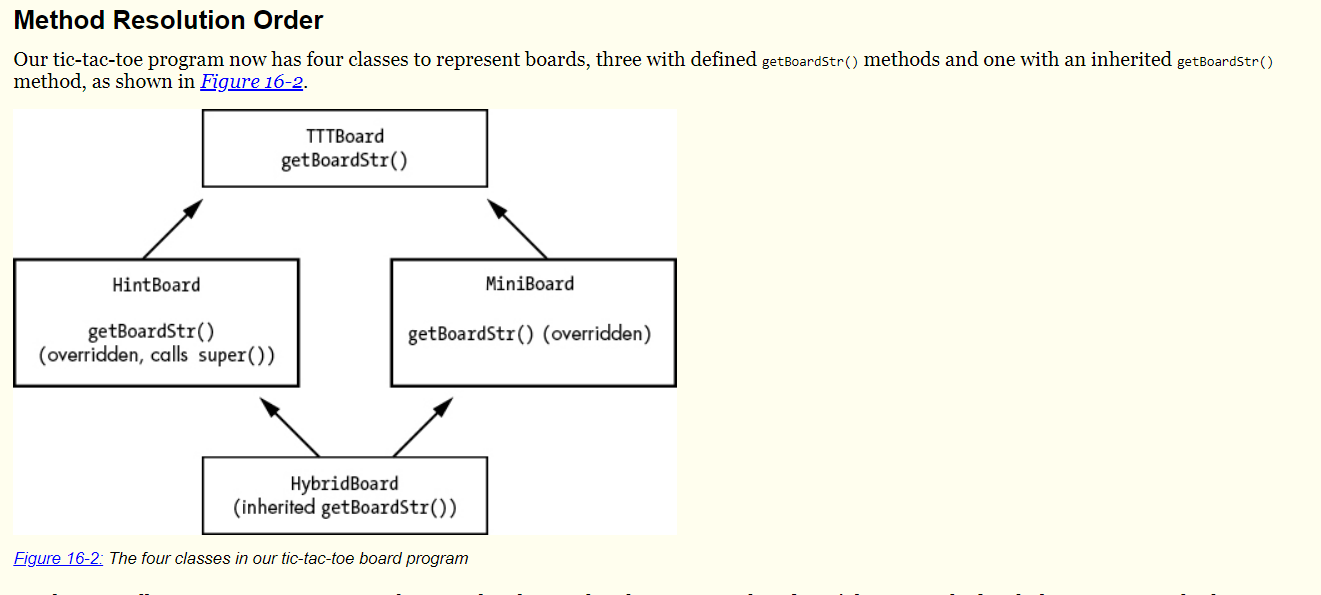

When we call getBoardStr() on a HybridBoard object, Python knows that the HybridBoard class doesn’t have a method with this name, so it checks its parent class. 

But the class has two parent classes, both of which have a getBoardStr() method. Which one gets called?

You can find out by checking the HybridBoard class’s MRO, which is the ordered list of classes that Python checks when inheriting methods or when a method calls the super() function. 

You can see the HybridBoard class’s MRO by calling its mro() method in the interactive shell:

In [16]:
HybridBoard.mro()

[__main__.HybridBoard,
 __main__.HintBoard,
 __main__.MiniBoard,
 __main__.TTTBoard,
 object]

From this return value, you can see that when a method is called on HybridBoard, Python first checks for it in the HybridBoard class. 

If it’s not there, Python checks the HintBoard class, then the MiniBoard class, and finally the TTTBoard class. At the end of every MRO list is the built-in object class, which is the parent class of all classes in Python.

For single inheritance, determining the MRO is easy: just make a chain of parent classes. For multiple inheritance, it’s trickier. 

Python’s MRO follows the C3 algorithm, whose details are beyond the scope of this book. But you can determine the MRO by remembering two rules:

Python checks child classes before parent classes.
Python checks inherited classes listed left to right in the class statement.


If we call getBoardStr() on a HybridBoard object, Python checks the HybridBoard class first. Then, because the class’s parents from left to right are HintBoard and MiniBoard, Python checks HintBoard. This parent class has a getBoardStr() method, so HybridBoard inherits and calls it.

But it doesn’t end there: next, this method calls super().getBoardStr(). Super is a somewhat misleading name for Python’s super() function, because it doesn’t return the parent class but rather the next class in the MRO. 

This means that when we call getBoardStr() on a HybridBoard object, the next class in its MRO, after HintBoard, is MiniBoard, not the parent class TTTBoard. So the call to super().getBoardStr() calls the MiniBoard class’s getBoardStr() method, which returns the miniature tic-tac-toe board string. 

The remaining code in the HintBoard class’s getBoardStr() after this super() call appends the hint text to this string.

If we change the HybridBoard class’s class statement so it lists MiniBoard first and HintBoard second, its MRO will put MiniBoard before HintBoard. 

This means HybridBoard inherits getBoardStr() from MiniBoard, which doesn’t have a call to super(). 

This ordering is what caused the bug that made the miniature tic-tac-toe board display without hints: without a super() call, the MiniBoard class’s getBoardStr() method never calls the HintBoard class’s getBoardStr() method.

Multiple inheritance allows you to create a lot of functionality in a small amount of code but easily leads to overengineered, hard-to-understand code. 

Favor single inheritance, mixin classes, or no inheritance. These techniques are often more than capable of carrying out your program’s tasks.

[Back to Top](#chapter_16_title)<br>